# Unsupervised Learning

### Objective
Goal is to classify and segregate silhouette of a vehicle into buckets of bus, van and car1 or car2.

### Context
The data contains features extracted from the silhouette of vehicles in different angles (A double decker bus, Cheverolet van, Saab 9000 car and an Opel Manta 400 car). 

### Approach
Here the bus, van and either one of the cars would be readily distinguishable, but it would be tricky to distinguish between the cars. Hence we would build a Classifier on raw data and also on PCA components to compare model performances.

### Importing Libraries

In [1]:
import warnings 
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score

%matplotlib inline 
warnings.filterwarnings('ignore')

### Reading dataset

In [2]:
vehicle_data = pd.read_csv('vehicle-1.csv')
vehicle_data.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [3]:
# Get number of rows and columns
vehicle_data.shape

(846, 19)

In [4]:
# Get information about column data types and non-null values
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [5]:
# Converting class from object to int using encoding
le = LabelEncoder() 
vehicle_data['class'] = le.fit_transform(vehicle_data['class'])
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0            183      0

Encoding for class attribute is as follows:
- 0: Bus
- 1: Car
- 2: Van

In [6]:
# Get number of missing values in each column
vehicle_data.isnull().sum().sort_values() 

compactness                    0
hollows_ratio                  0
max.length_aspect_ratio        0
max.length_rectangularity      0
class                          0
scatter_ratio                  1
elongatedness                  1
skewness_about.1               1
skewness_about.2               1
pr.axis_aspect_ratio           2
scaled_variance.1              2
scaled_radius_of_gyration      2
pr.axis_rectangularity         3
scaled_variance                3
distance_circularity           4
scaled_radius_of_gyration.1    4
circularity                    5
skewness_about                 6
radius_ratio                   6
dtype: int64

#### Observations

- Dataframe has 846 rows and 19 columns.
- Values are geometric features extracted from the silhouette.
- All columns except 'calss' (target column) were numerical in nature, but now has been converted using encoding.
- All columns except 'compactness', 'max.length_aspect_ratio', 'max.length_rectangularity', 'hollows_ratio' and 'class' have NULL values in them.

### Exploratory Data Analysis

In [7]:
#Five-point summary
vehicle_data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    1.0     2.0

In [8]:
# Making a copy of original dataframe to fix missing values by imputation
temp_df = vehicle_data.copy()

In [9]:
# Imputate median in place of missing values

num_cols = temp_df.iloc[:,0:19] 
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)

transformed_values = imputer.fit_transform(num_cols)
column = num_cols.columns

vehicle_data_updated = pd.DataFrame(transformed_values, columns = column)
vehicle_data_updated.head(10)


compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   
5        107.0         44.0                 106.0         172.0   
6         97.0         43.0                  73.0         173.0   
7         90.0         43.0                  66.0         157.0   
8         86.0         34.0                  62.0         140.0   
9         93.0         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   
5                  50.0                      6.0          255.0   
6                  65.0                      6.0          153.0   
7                  65.0                      9.0          137.0   
8                  61.0                      7.0          122.0   
9                  62.0                     11.0          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   
5           26.0                    28.0                      169.0   
6           42.0                    19.0                      143.0   
7           48.0                    18.0                      146.0   
8           54.0                    17.0                      127.0   
9           36.0                    22.0                      146.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  class  
0             187.0          197.0    2.0  
1             189.0          199.0    2.0  
2             188.0          196.0    1.0  
3             199.0          207.0    2.0  
4             180.0        

In [10]:
vehicle_data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    float64
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    float64
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    float64
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

In [11]:
vehicle_data_updated.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

In [12]:
# Dropping 'class' column as it's the target variable and PCA should only be perfromed on independent attribute

updated_df = vehicle_data_updated.drop('class', axis=1)
updated_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   
5        107.0         44.0                 106.0         172.0   
6         97.0         43.0                  73.0         173.0   
7         90.0         43.0                  66.0         157.0   
8         86.0         34.0                  62.0         140.0   
9         93.0         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   
5                  50.0                      6.0          255.0   
6                  65.0                      6.0          153.0   
7                  65.0                      9.0          137.0   
8                  61.0                      7.0          122.0   
9                  62.0                     11.0          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   
5           26.0                    28.0                      169.0   
6           42.0                    19.0                      143.0   
7           48.0                    18.0                      146.0   
8           54.0                    17.0                      127.0   
9           36.0                    22.0                      146.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  
0             187.0          197.0  
1             189.0          199.0  
2             188.0          196.0  
3             199.0          207.0  
4             180.0          183.0  
5             181.0      

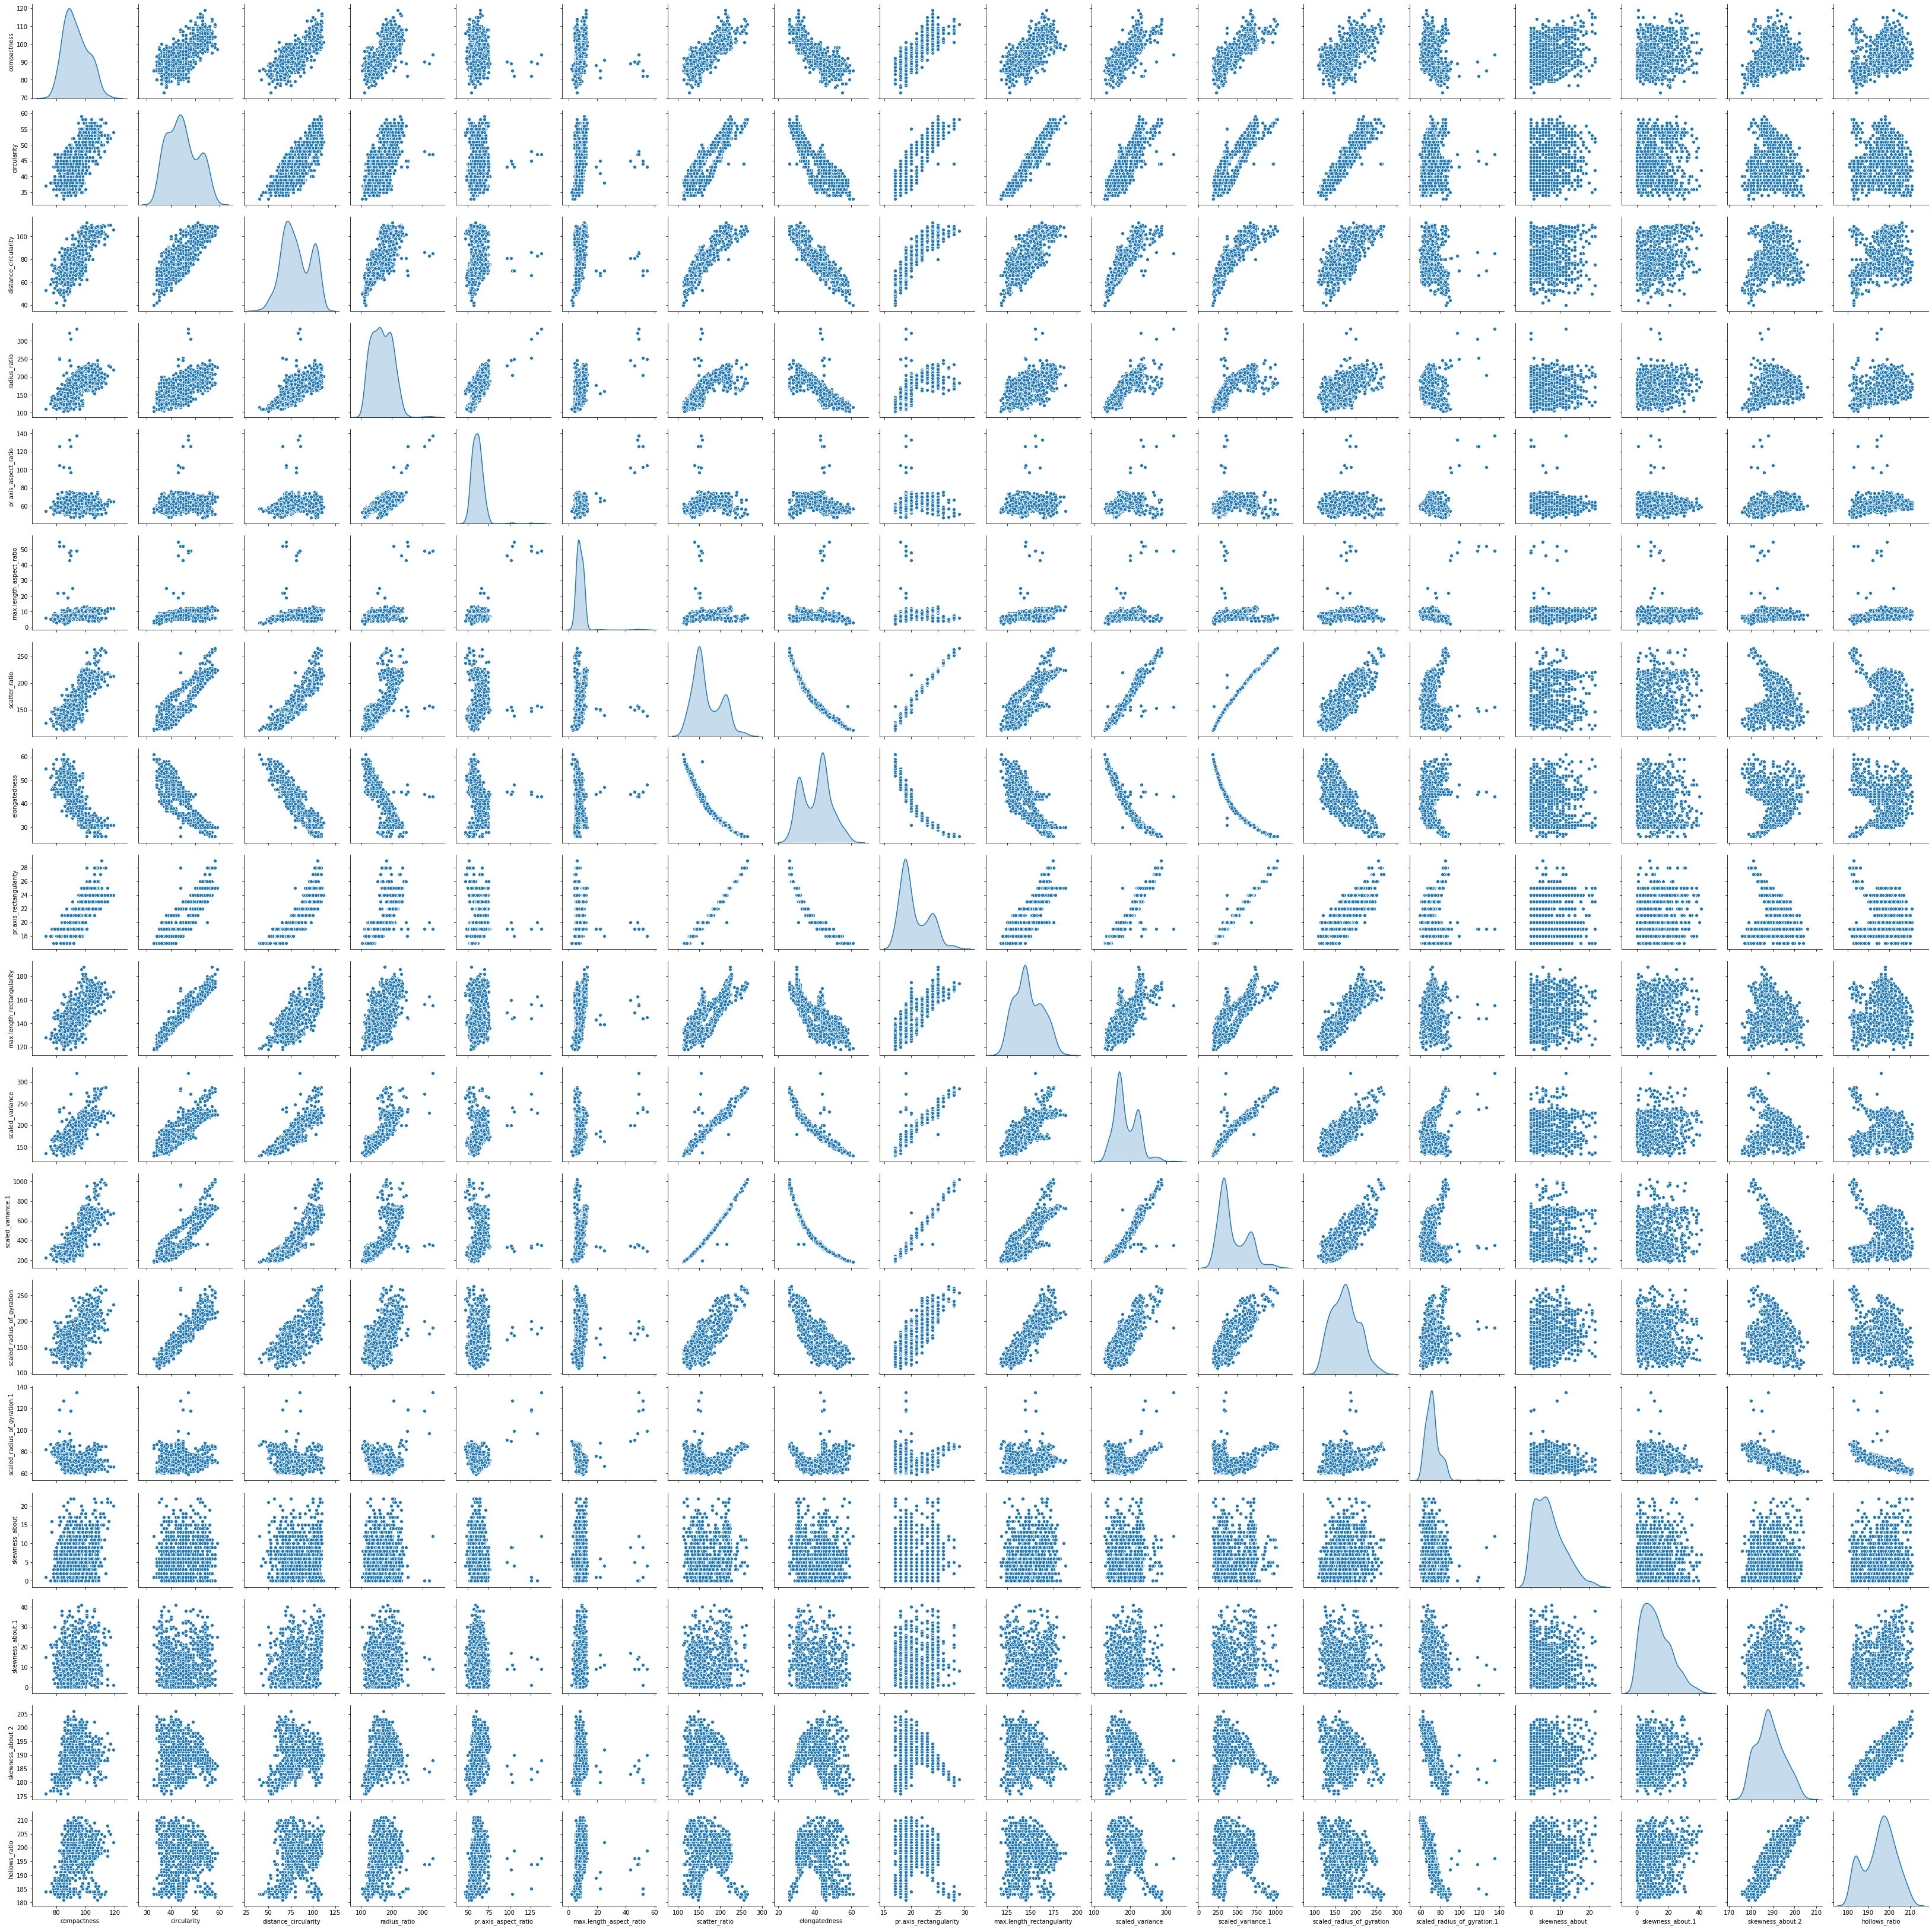

In [13]:
sns.pairplot(updated_df, diag_kind='kde');

In [4]:
# Check how each columns are distributed
updated_df.hist(bins=20, figsize=(40,40));

NameError: name 'updated_df' is not defined

#### Observations

- Some of the attributes show long tail and is hence bound to have outliers.
- Using simpleimputer, missing values from orginal datframe are treated and replaced using their respective medians.
- Pairplot clearly shows many columns are correlated as we proceed further, we would be usinga correlation matrix to check the strength of correlation.
- All attributes except 'compactness', 'circularity', 'distance_circularity', 'elongatedness', 'hollows_ratio' and 'scaled_radius_of_gyration' are right skewed.

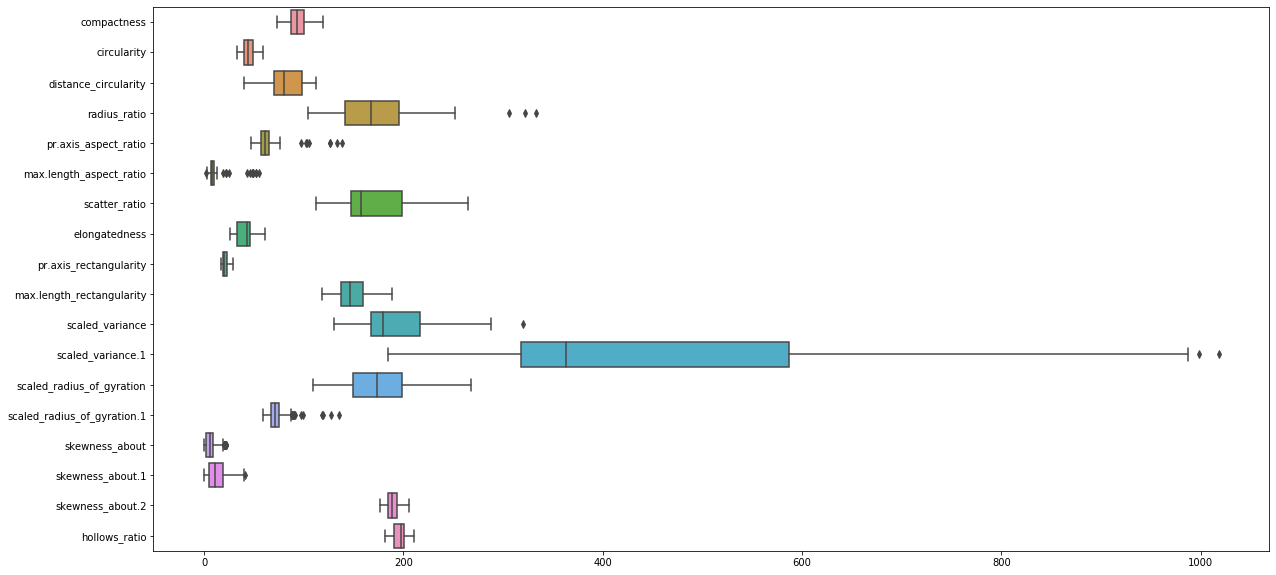

In [15]:
# Checking for outliers

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.set(font_scale=1.5)
sns.boxplot(data=updated_df, orient="h");

In [16]:
# Calculating number of ouliers per column

df = updated_df
Q1 = updated_df.quantile(q = 0.25) 
Q3 = updated_df.quantile(q = 0.75) 
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values()

compactness                     0
scaled_radius_of_gyration       0
max.length_rectangularity       0
skewness_about.2                0
elongatedness                   0
scatter_ratio                   0
pr.axis_rectangularity          0
distance_circularity            0
circularity                     0
hollows_ratio                   0
scaled_variance                 1
skewness_about.1                1
scaled_variance.1               2
radius_ratio                    3
pr.axis_aspect_ratio            8
skewness_about                 12
max.length_aspect_ratio        13
scaled_radius_of_gyration.1    15
dtype: int64

In [17]:
#Calculating Skew

skewValue = updated_df.skew()
print("skewValue of dataframe attributes\n\n", skewValue)

skewValue of dataframe attributes

 compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
dtype: float64


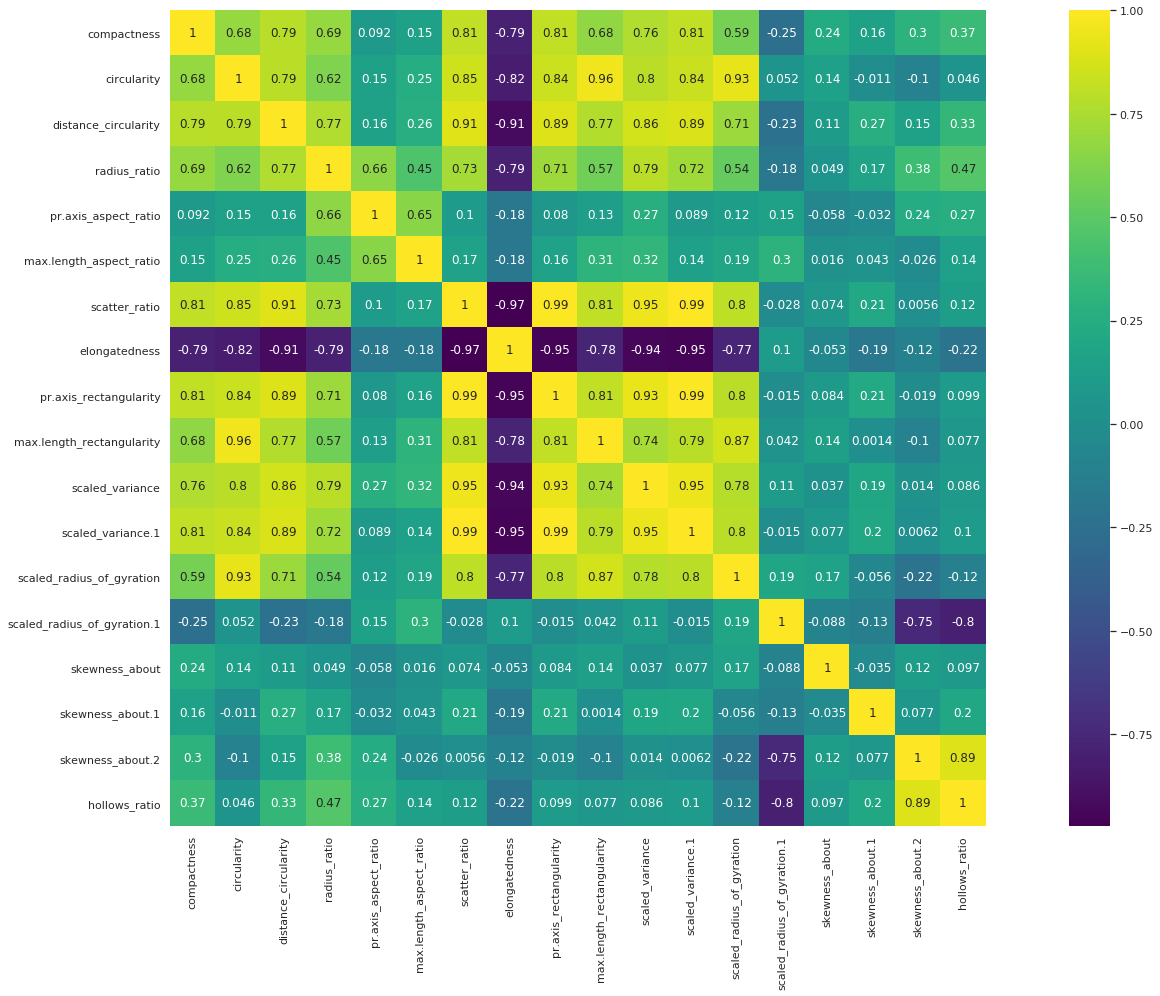

In [18]:
correlation = updated_df.corr()
sns.set(font_scale=1)
plt.figure(figsize=(30, 15))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis');

#### Obervation

##### Strong Correlation:

- scaled_variance and scaled_variance.1 seems to be strongly correlated
- skewness_about_2 and hollow_ratio seems to be strongly correlated
- ditance_circularity and radius_ratio seems to have high positive correlation
- compactness & circularity, radius_ratio & pr.axis_aspect_ratio also seems be correlated
- scaled_variance and scaled_radius_of_gyration, circularity & distance_circularity also seems to be highly correlated
- pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated
- scatter_ratio and elongatedness seems to be have strong negative correlation
- elongatedness and pr.axis_rectangularity seems to have strong negative correlation

##### Little to no Correlation:

- max_length_aspect_ratio & radius_ratio have average correlation
- pr.axis_aspect_ratio & max_length_aspect_ratio seems to have very little correlation
- scaled_radius_gyration & scaled_radisu_gyration.1 seems to be very little correlated
- scaled_radius_gyration.1 & skewness_about seems to be very little correlated
- skewness_about & skewness_about.1 not be correlated
- skewness_about.1 and skewness_about.2 are not correlated.

### Splitting data

In [19]:
# Independant variables
X = vehicle_data_updated.iloc[:,0:18].values

# Dependent variable
y = vehicle_data_updated.iloc[:,18].values

# Splitting whole data's 70% training set and 30% to testing set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 10)

#### Normalizing Dataset

In [20]:
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)
X_test_std =  sc.fit_transform(X_test)    

#### Calculating covariance matrix

In [21]:
cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix\n\n', (cov_matrix))

Covariance Matrix

 [[ 1.00169205  0.69510999  0.79093174  0.68430087  0.10533174  0.13879193
   0.81466568 -0.79249053  0.81562662  0.69493762  0.75883574  0.81360243
   0.6018784  -0.23802643  0.21659465  0.16129088  0.29107259  0.36229106]
 [ 0.69510999  1.00169205  0.80101871  0.63753441  0.17332159  0.23038915
   0.85124238 -0.82911962  0.84353731  0.96223666  0.79821698  0.8377724
   0.92490531  0.04164937  0.12317003  0.0144264  -0.08843129  0.06521593]
 [ 0.79093174  0.80101871  1.00169205  0.76084958  0.1703543   0.25346094
   0.90364003 -0.91115044  0.89344273  0.79364077  0.85618354  0.88392536
   0.72188889 -0.20587281  0.09535999  0.26881961  0.13214005  0.3236881 ]
 [ 0.68430087  0.63753441  0.76084958  1.00169205  0.68494799  0.47133546
   0.72992301 -0.78442329  0.7057782   0.60117669  0.79595443  0.7127739
   0.55325762 -0.13680084  0.02938361  0.17620666  0.36656842  0.46385678]
 [ 0.10533174  0.17332159  0.1703543   0.68494799  1.00169205  0.6847859
   0.10994971 -0.

#### Generating eigen values and eigen vectors

In [22]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)

print('Eigen Values\n\n%s' %e_vals)
print('\nEigen Vectors\n\n%s' %e_vecs)

Eigen Values

[9.43334997e+00 2.94762053e+00 1.98496007e+00 1.16110027e+00
 9.40176256e-01 5.10373475e-01 3.44827341e-01 2.22885724e-01
 1.54712405e-01 9.27438518e-02 7.09752323e-02 4.76588555e-02
 3.75787193e-02 3.90755496e-03 2.79042100e-02 1.13130678e-02
 1.72656169e-02 2.11037078e-02]

Eigen Vectors

[[ 0.2750839   0.12784374  0.1159604  -0.0736998  -0.08298631  0.16619902
   0.45405819  0.57945595  0.45440883 -0.28074428  0.00669863  0.00114313
  -0.14760701 -0.01457711 -0.03256055 -0.00732469  0.06280839 -0.0157956 ]
 [ 0.29404423 -0.10880657  0.03079054 -0.18229829  0.08792926 -0.3373792
  -0.23559572  0.18743624  0.01850061  0.10009676  0.01430145 -0.25384239
  -0.0429882  -0.00962968  0.59042417  0.07967834  0.27177991  0.38674013]
 [ 0.30389322  0.06858713  0.05482235  0.07330541 -0.04192866 -0.14120194
   0.10595199 -0.42917571  0.15267079 -0.29970476  0.67874648  0.00159816
   0.22008418  0.01367399 -0.10866774 -0.02798734  0.02168137  0.20478086]
 [ 0.26773956  0.18302728 

#### Sorting eigen values and vectors in descending order

In [23]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(e_vals[index], e_vecs[:,index]) for index in range(len(e_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
e_vals_sorted = [eig_pairs[index][0] for index in range(len(e_vals))]
e_vecs_sorted = [eig_pairs[index][1] for index in range(len(e_vals))]

#### Eigen value vs. Cummalative of variation

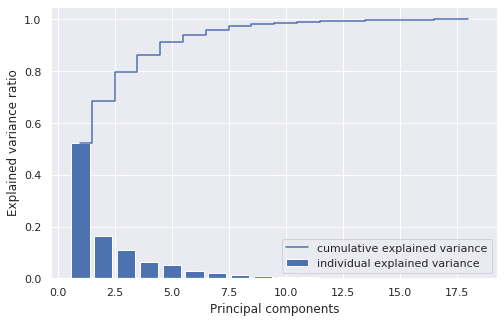

In [24]:
tot = sum(e_vals)
var_explained = [(i / tot) for i in sorted(e_vals, reverse=True)]
cumulat_var_exp = np.cumsum(var_explained)

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

plt.bar(range(1,19), var_explained, align='center', label='individual explained variance');
plt.step(range(1,19),cumulat_var_exp, where= 'mid', label='cumulative explained variance');

plt.ylabel('Explained variance ratio');
plt.xlabel('Principal components');
plt.legend(loc = 'best');

## Dimensionality Reduction

In [25]:
p_reduce = np.array(e_vecs_sorted[0:8]) 

X_train_pca = np.dot(X_train_std, p_reduce.T) 
X_test_pca = np.dot(X_test_std, p_reduce.T) 

projected_df_train = pd.DataFrame(X_train_pca)
projected_df_test = pd.DataFrame(X_test_pca)

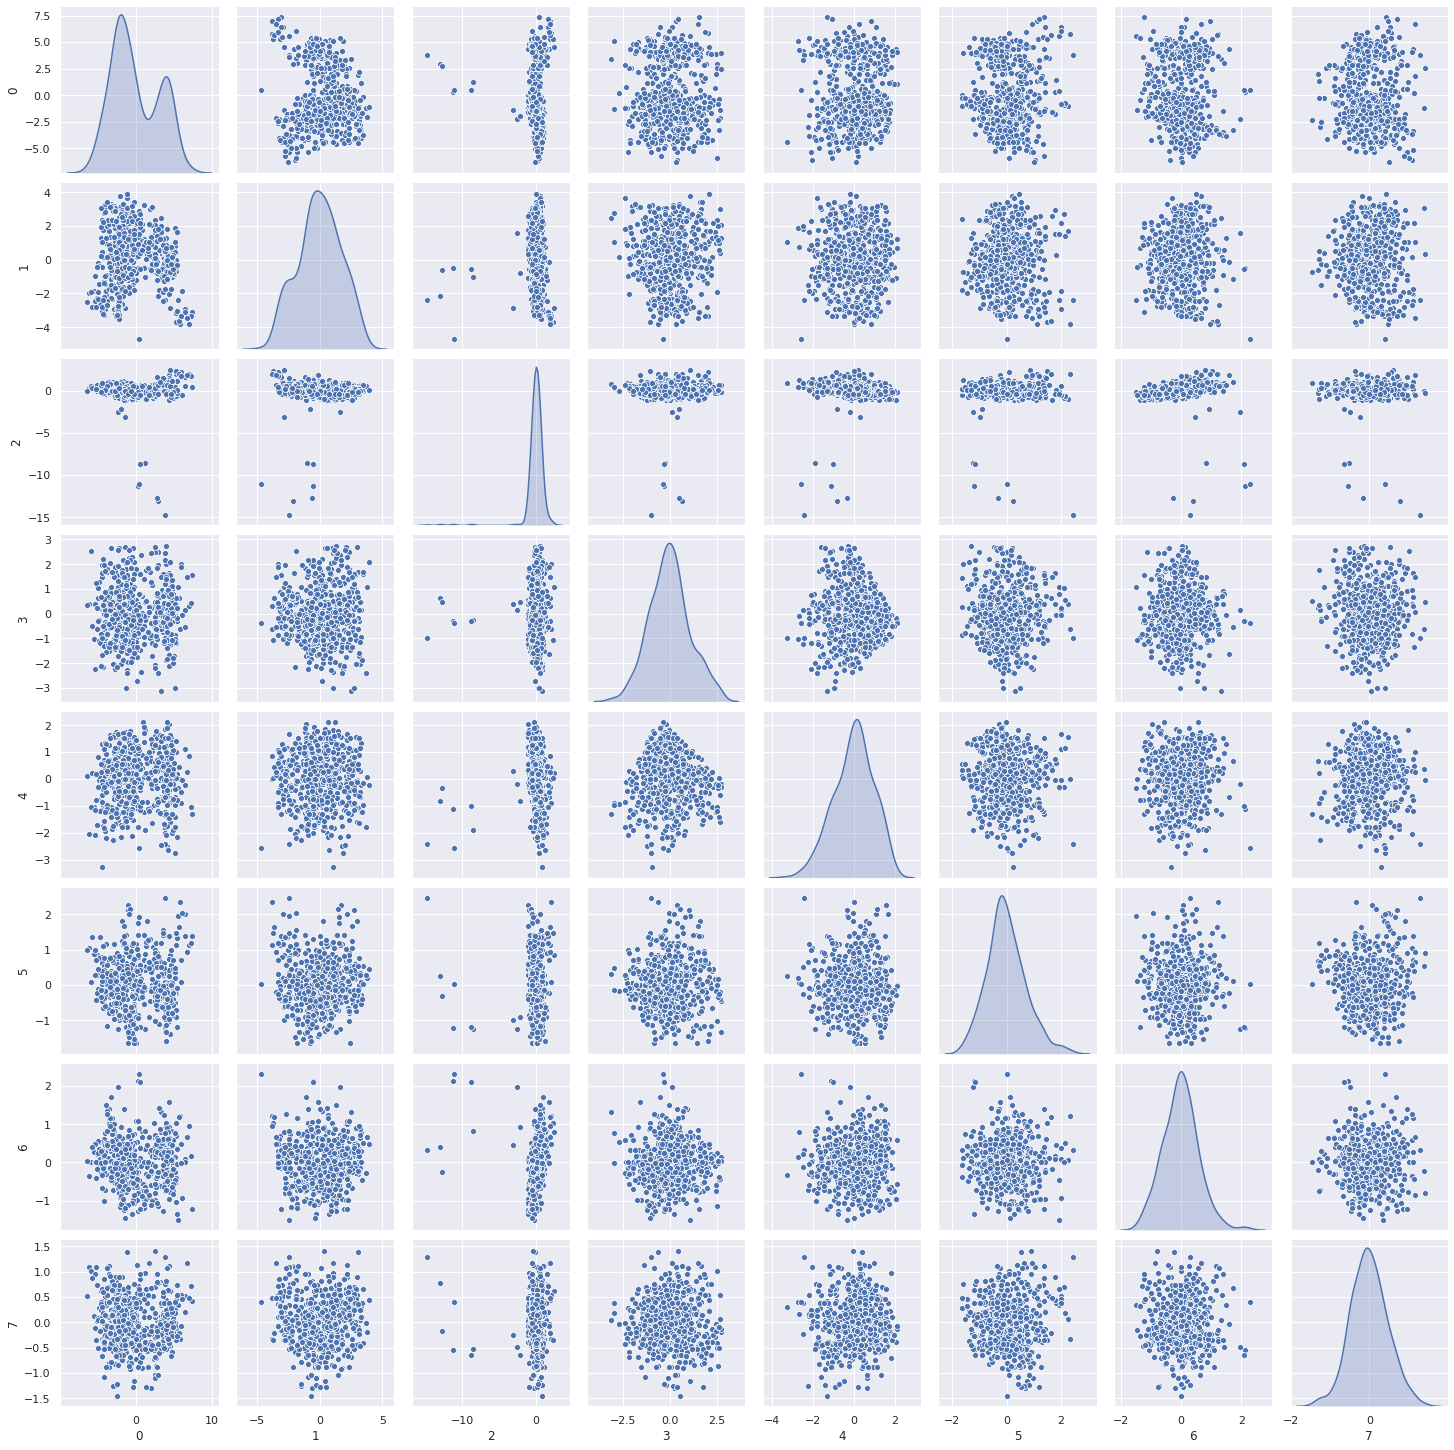

In [26]:
sns.pairplot(projected_df_train, diag_kind='kde');

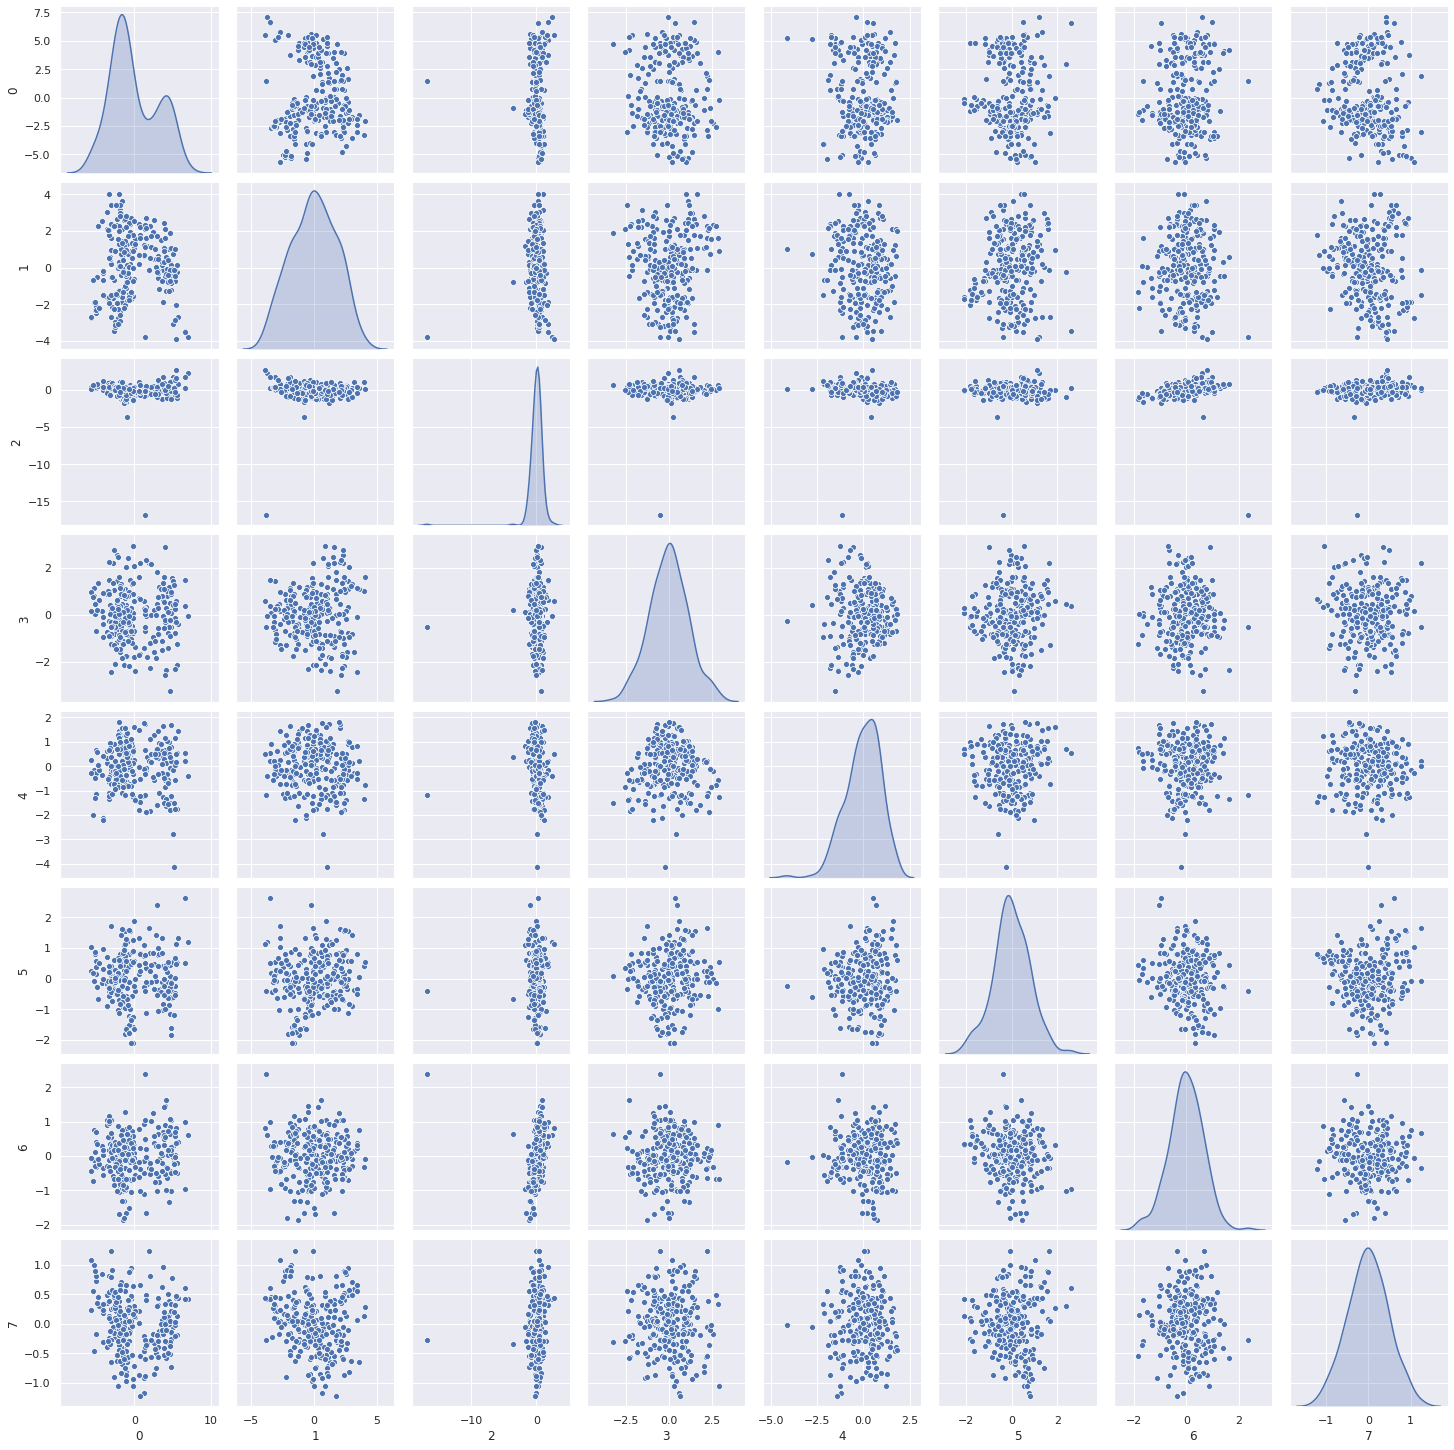

In [27]:
sns.pairplot(projected_df_test, diag_kind='kde');

#### Observation
- The new dataframe generated after we performed PCA has no linear relationship among themseleves
- Almost all attribures have data spread around with no positive or negative correlation.

### Model Building

In [28]:
classifier1 = SVC()
classifier1.fit(X_train_std, y_train)
print ('Before PCA score: ', classifier1.score(X_test_std, y_test))

classifier2 = SVC()
classifier2.fit(X_train_pca, y_train)
print ('After PCA score: ', classifier2.score(X_test_pca, y_test))

Before PCA score:  0.9566929133858267
After PCA score:  0.937007874015748


In [29]:
orig_y_predict = classifier1.predict(X_test_std)
pca_y_predict= classifier2.predict(X_test_pca)

print("Before PCA (On Original 18 Dimension):", accuracy_score(y_test, orig_y_predict))
print("After PCA (On 8 dimension):", accuracy_score(y_test, pca_y_predict))

Before PCA (On Original 18 Dimension): 0.9566929133858267
After PCA (On 8 dimension): 0.937007874015748


#### Quick Observation

- On training data set with a support vector classifier (without PCA), we observed an accuracy score of 95.66% (~96%)
- But when we applied PCA componenets(reduced dimensions) and trained the SVC model, it still performed better with an accuracy score of 94.88% (~95%).
- The model has fared well in terms of accuracy score, considering the fact that original dataframe had 18 dimensions and After PCA dimension reduced to 8.

### Confusion Matrix Visualization

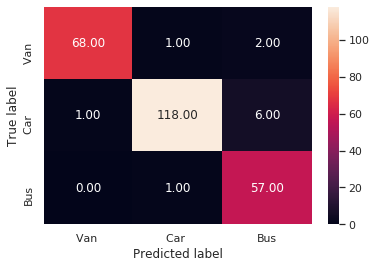

In [30]:
# Confusion Matrix - Original data

cm = confusion_matrix( y_test, orig_y_predict, [0,1,2] )
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Van ", "Car ", "Bus"] , yticklabels = ["Van ", "Car ", "Bus"]);
plt.ylabel('True label');
plt.xlabel('Predicted label');

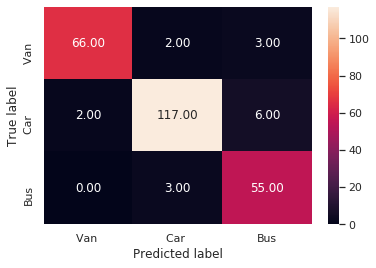

In [31]:
# Confusion Matrix - PCA Applied, reduced dimensions

cm = confusion_matrix( y_test, pca_y_predict, [0,1,2] )
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Van ", "Car ", "Bus"] , yticklabels = ["Van ", "Car ", "Bus"]);
plt.ylabel('True label');
plt.xlabel('Predicted label');

### Classification Report

In [32]:
# Original data
print("\nOriginal Data:", "\n\n", classification_report(y_test, orig_y_predict), "\n\n")

# Reduced Dimensions
print("After PCA:","\n", classification_report(y_test, pca_y_predict))


Original Data: 

               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        71
         1.0       0.98      0.94      0.96       125
         2.0       0.88      0.98      0.93        58

    accuracy                           0.96       254
   macro avg       0.95      0.96      0.95       254
weighted avg       0.96      0.96      0.96       254
 


After PCA: 
               precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        71
         1.0       0.96      0.94      0.95       125
         2.0       0.86      0.95      0.90        58

    accuracy                           0.94       254
   macro avg       0.93      0.94      0.93       254
weighted avg       0.94      0.94      0.94       254



### Conclusion

- Based on the above results, both the models perform equally well and has almost the same level of precitiability.
- Even after reducing dimesions from 18 to 8, we only observed a drop in accuracy from 96% to 95%.
- Uses PCA only when the original dimensions have linear relations.